### Imports

In [404]:
import warnings; warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

### Read and display data frame

In [405]:
df = pd.read_csv("./data/dataset_31_credit-g.csv")
display(df.head(5))

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


### Remove extra quotes from cells when type is string

In [406]:
def strip_quotes(x):
    return x.replace("'", "").replace('"', '') if isinstance(x, str) else x

df = df.applymap(strip_quotes)
display(df.head(5))

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


### Clean Up Checking Status and Employment Categories
#### Ranges replaced with averages, Greater thans / less thans replaced with that number

In [407]:
display(df.checking_status.unique())
display(df.employment.unique())

def range_to_mean(x):
    if not isinstance(x, str):
        return x

    x = x.replace("no checking", "0").replace("unemployed", "0").replace("<0", "0").replace("<1", "1").replace(">=", "")
    if "X" in x:
        x = str(np.array([int(xk.replace("<", "").replace("=", "")) for xk in x.split("X")]).mean())

    return x

df = df.applymap(range_to_mean)

display(df.checking_status.unique())
display(df.employment.unique())

display(df.head(5))

array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)

array(['0', '100.0', '200'], dtype=object)

array(['7', '2.5', '5.5', '0', '1'], dtype=object)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0,6,critical/other existing credit,radio/tv,1169,no known savings,7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,100.0,48,existing paid,radio/tv,5951,100,2.5,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,0,12,critical/other existing credit,education,2096,100,5.5,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,0,42,existing paid,furniture/equipment,7882,100,5.5,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,0,24,delayed previously,new car,4870,100,2.5,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


#### To Numeric for Updated Columns

In [408]:
cols_to_convert = ["checking_status", "employment"]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors="coerce")
display(df.head(5))

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.0,6,critical/other existing credit,radio/tv,1169,no known savings,7.0,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,100.0,48,existing paid,radio/tv,5951,100,2.5,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,0.0,12,critical/other existing credit,education,2096,100,5.5,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,0.0,42,existing paid,furniture/equipment,7882,100,5.5,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,0.0,24,delayed previously,new car,4870,100,2.5,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


### Looking at Distributions with Color by Credit Worthiness

In [409]:
def displot_wrapper(df, colname:str="", xlabel:str=""):
    plt.figure()
    sns.displot(data=df, x=colname, kind="kde", hue="class", fill=True, palette=sns.color_palette('bright')[:3], multiple="layer")
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.show()

<Figure size 640x480 with 0 Axes>

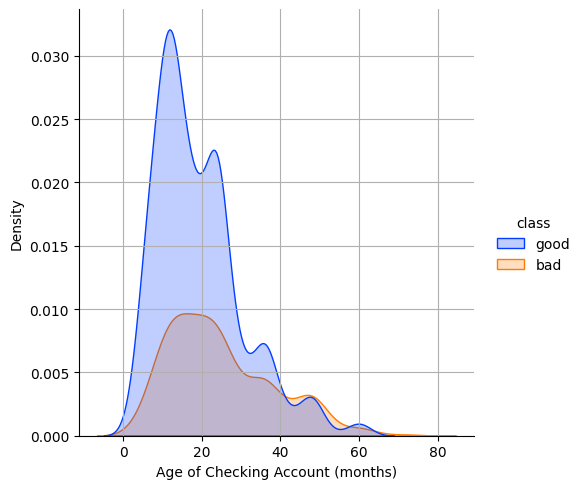

<Figure size 640x480 with 0 Axes>

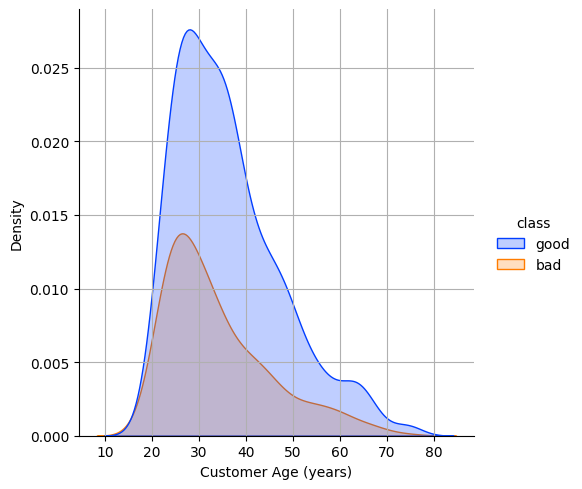

<Figure size 640x480 with 0 Axes>

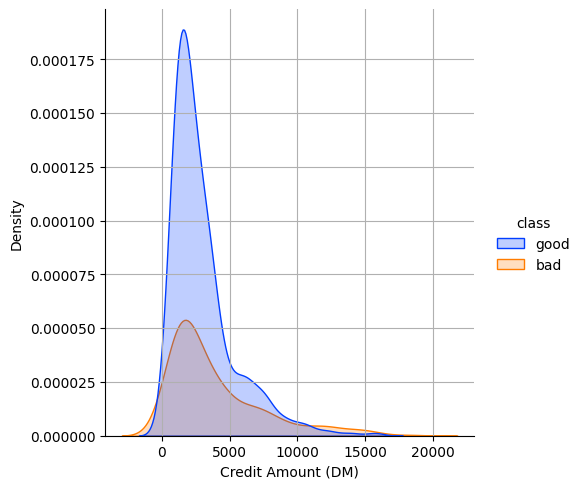

In [410]:
displot_wrapper(df, colname="duration", xlabel="Age of Checking Account (months)")
displot_wrapper(df, colname="age", xlabel="Customer Age (years)")
displot_wrapper(df, colname="credit_amount", xlabel="Credit Amount (DM)")

### Joint Plots Of Credit Amount vs Age - Do Older People Have More Credit (Debt)?

<Figure size 640x480 with 0 Axes>

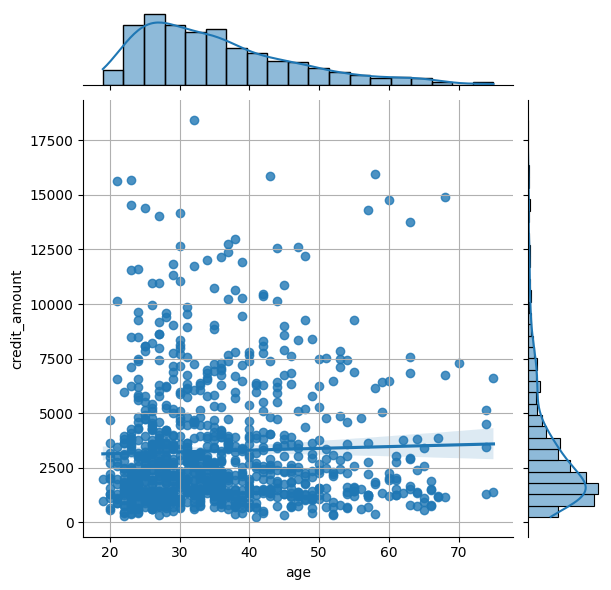

In [411]:
plt.figure()
sns.jointplot(df, y="credit_amount", x="age", kind="reg") # "scatter", "hist", "hex", "kde", "reg", "resid"
plt.grid(True)
plt.show()

### Compute Probability of Good Credit Worthiness vs. Age (Binned Age)

#### Ugly way

In [412]:
bin_edges = np.arange(10, 90, 10)
age_cut = pd.cut(df["age"], bin_edges, right=False)
xx = df[["age"]].groupby(age_cut).count()
xx = xx.rename(columns={"age":"count"})
xx["num-good"] = df.query("`class` == 'good'")[["age"]].groupby(age_cut).count()
xx["percent-good"] = xx["num-good"]/xx["count"]*100
xx["avg-credit"] = df.groupby(age_cut)[["credit_amount"]].mean()
xx["max-credit"] = df.groupby(age_cut)[["credit_amount"]].max()
xx["med-credit"] = df.groupby(age_cut)[["credit_amount"]].median()
display(xx)

,count,num-good,percent-good,avg-credit,max-credit,med-credit
age,,,,,,
"[10, 20)",2,1,50.000000,1481.500000,1980,1481.5
"[20, 30)",369,233,63.143631,3097.701897,15672,2221.0
"[30, 40)",330,245,74.242424,3404.260606,18424,2390.5
"[40, 50)",174,130,74.712644,3404.005747,15857,2364.0
"[50, 60)",74,53,71.621622,3248.378378,15945,2233.0
"[60, 70)",44,32,72.727273,3169.568182,14896,1924.0
"[70, 80)",7,6,85.714286,4242.714286,7308,4526.0


#### Cleaner way

In [413]:
x = df.query("`class` == 'good'").groupby(age_cut)[["credit_amount"]].agg(["count"])["credit_amount"]
y = df.groupby(age_cut)[["credit_amount"]].agg(["count", "mean", "median", "max"])["credit_amount"]
y["percent-good"] = x[["count"]]/y[["count"]]*100.0
display(y)

,count,mean,median,max,percent-good
age,,,,,
"[10, 20)",2,1481.500000,1481.5,1980,50.000000
"[20, 30)",369,3097.701897,2221.0,15672,63.143631
"[30, 40)",330,3404.260606,2390.5,18424,74.242424
"[40, 50)",174,3404.005747,2364.0,15857,74.712644
"[50, 60)",74,3248.378378,2233.0,15945,71.621622
"[60, 70)",44,3169.568182,1924.0,14896,72.727273
"[70, 80)",7,4242.714286,4526.0,7308,85.714286


#### Verification

In [414]:
# Recompute the pd.cut results manually
for k in range(len(bin_edges) - 1):
    query_str = "age >= %d and age < %d" % (bin_edges[k], bin_edges[k + 1])
    temp_series = df.query(query_str)["credit_amount"]
    count = temp_series.count()
    avg_credit = temp_series.mean()
    max_credit = temp_series.max()
    print("Age [%d, %d) Count = %3d, Avg Credit = %8.2f, Max Credit = %8.2f, Amounts = %s" %
          (bin_edges[k], bin_edges[k + 1], count, avg_credit, max_credit, temp_series.tolist()[0:5]))

Age [10, 20) Count =   2, Avg Credit =  1481.50, Max Credit =  1980.00, Amounts = [983, 1980]
Age [20, 30) Count = 369, Avg Credit =  3097.70, Max Credit = 15672.00, Amounts = [5951, 5234, 1295, 4308, 1567]
Age [30, 40) Count = 330, Avg Credit =  3404.26, Max Credit = 18424.00, Amounts = [9055, 6948, 1282, 3430, 1374]
Age [40, 50) Count = 174, Avg Credit =  3404.01, Max Credit = 15857.00, Amounts = [2096, 7882, 12579, 2134, 2647]
Age [50, 60) Count =  74, Avg Credit =  3248.38, Max Credit = 15945.00, Amounts = [4870, 2835, 2424, 1264, 6143]
Age [60, 70) Count =  44, Avg Credit =  3169.57, Max Credit = 14896.00, Amounts = [1169, 3059, 1199, 6836, 1953]
Age [70, 80) Count =   7, Avg Credit =  4242.71, Max Credit =  7308.00, Amounts = [7308, 5129, 6615, 3448, 1374]


#### Bar Plot - Probability of Good Credit Worthiness vs. Age

In [415]:
px.bar(xx, x=bin_edges[0:-1] + 5, y="percent-good",
       labels={"x":"Age (Years)", "percent-good":"Probability of Good Credit Worthiness"})

#### Bar Plot - Average and Median Credit Amount vs. Age

In [416]:
px.bar(xx, x=bin_edges[0:-1] + 5, y=["avg-credit", "med-credit"],
       barmode='group', labels={"x":"Age (Years)", "value":"Credit Amount (Deutsche Mark)"})

### Heatmap of credit amount vs. age

#### Pretty misleading plot actually - raw counts across age buckets are basically useless

In [420]:
px.density_heatmap(df, x="age", y="credit_amount", marginal_x="histogram", marginal_y="histogram",
                   labels={"age":"Age (Years)", "credit_amount":"Credit Amount (Deutsche Mark)"})